In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/resume-data/data.csv
/kaggle/input/updatedresumedataset/UpdatedResumeDataSet.csv


In [2]:
df2 = pd.read_csv("/kaggle/input/updatedresumedataset/UpdatedResumeDataSet.csv")
df2

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [3]:
df1 = pd.read_csv("/kaggle/input/resume-data/data.csv")
df1['Technologies'] = df1['Technologies'].str.replace('/', ' ', regex=False)
df1

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab Python Pyspark Scikit-learn Tensorflow,Master,1,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python Java Scala MongoDB,Master,3,Marseille
2,Delve,Lead data scientist,SPSS SQL Teradata R Python Tensorflow scikit-l...,Master,3,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C C++ Java Python,Master,"1,5",Marseille
4,Arm,Data scientist,Matlab Python C++ numpy Tensorflow scikit-learn,Phd,NaN,Bordeaux
...,...,...,...,...,...,...
9577,Massachusetts General Hospital(MGH),Data scientist,C++ R Python Matlab Matplotlib,Master,"1,5",Lyon
9578,Charles River Analytics,Data scientist,Excel Python Matlab R machine learning anglais,Master,11,Toulouse
9579,Ball Aerospace,Data scientist,R machine learning Excel VBA,Master,1,Paris
9580,Takeda Pharmaceutical,Data scientist,Python Pyspark machine learning Microsoft Azure,Master,17,Rennes


In [4]:
df3 = df1[['Metier','Technologies']]
df3 = df3.rename(columns={"Metier": "Category", "Technologies": "Resume"})
df = pd.concat([df2, df3])
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
9577,Data scientist,C++ R Python Matlab Matplotlib
9578,Data scientist,Excel Python Matlab R machine learning anglais
9579,Data scientist,R machine learning Excel VBA
9580,Data scientist,Python Pyspark machine learning Microsoft Azure


# Missing value

In [5]:
def missing_value(df):
    df_col = pd.DataFrame()
    df_col["nom_col"] = df.columns.tolist()
    df_col["type_col"] = df.dtypes.tolist()
    nb_missing_values = df.isnull().sum()
    list_no_val= []
    list_val = []
    percent_val = []
    unique_val = []
    for col in df:
        unique_val.append(len(df[col].unique()))
    
    for i in nb_missing_values:
        list_no_val.append(i)
        list_val.append(len(df)-i)
        percent_val.append((i / df.shape[0])*100)
    
    df_col["unique_val"] = unique_val
    df_col["nb_missing_val"] = list_no_val
    df_col["per_missing_val"] = percent_val
    df_col["nb_val"] = list_val
    return df_col

In [6]:
df_col=missing_value(df)
df_col.head()

,nom_col,type_col,unique_val,nb_missing_val,per_missing_val,nb_val
0,Category,object,30,19,0.180197,10525
1,Resume,object,223,0,0.000000,10544


In [7]:
df['Category'] = df['Category'].fillna('Unknow')

In [8]:
df_col=missing_value(df)
df_col.head()

,nom_col,type_col,unique_val,nb_missing_val,per_missing_val,nb_val
0,Category,object,30,0,0.0,10544
1,Resume,object,223,0,0.0,10544


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string

# EDA - Exploratory Data Analysis

In [10]:
# Display basic info about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10544 entries, 0 to 9581
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  10544 non-null  object
 1   Resume    10544 non-null  object
dtypes: object(2)
memory usage: 247.1+ KB
None


In [11]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


## Distribution of Resume Categories

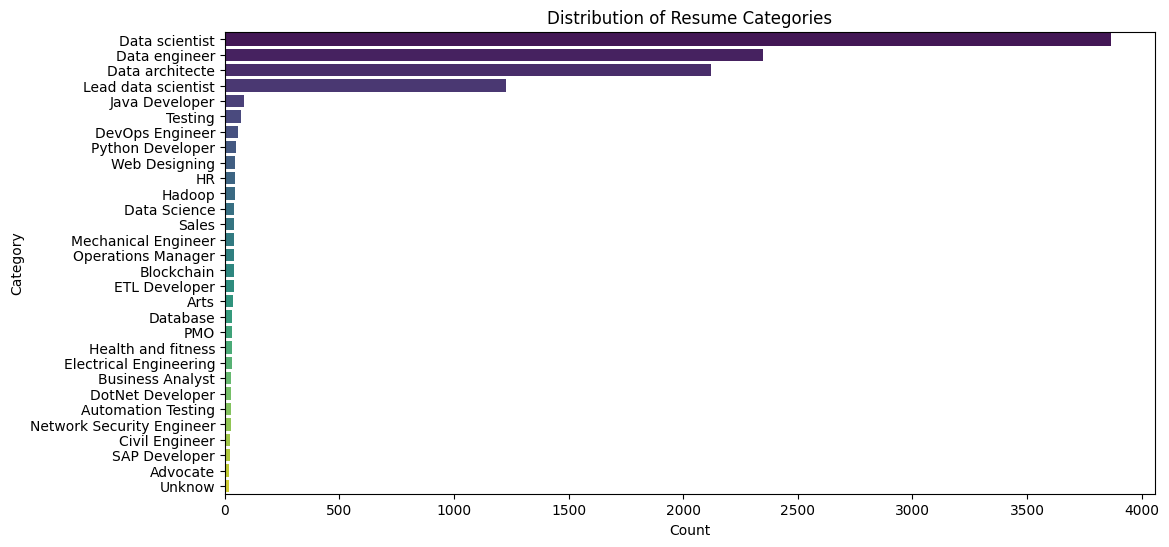

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette="viridis")
plt.title("Distribution of Resume Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

## Resume Length Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


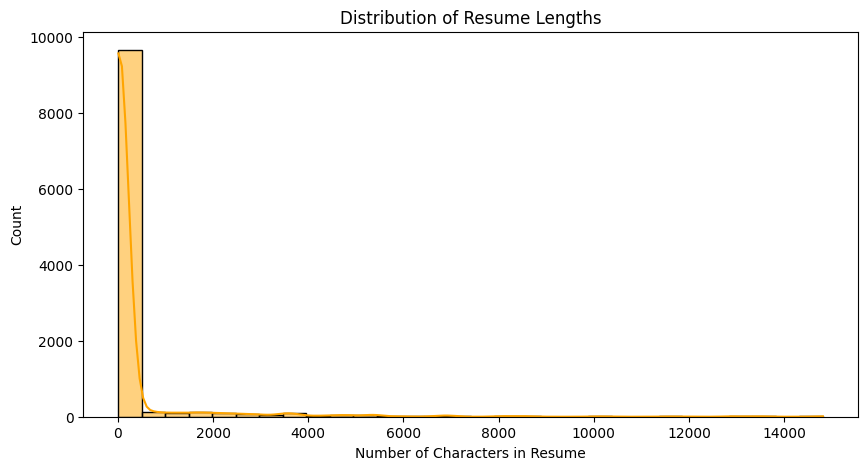

In [13]:
df['Resume_Length'] = df['Resume'].apply(lambda x: len(x))

plt.figure(figsize=(10, 5))
sns.histplot(df['Resume_Length'], bins=30, kde=True, color='orange')
plt.title("Distribution of Resume Lengths")
plt.xlabel("Number of Characters in Resume")
plt.ylabel("Count")
plt.show()

## WordCloud of Most Common Words

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


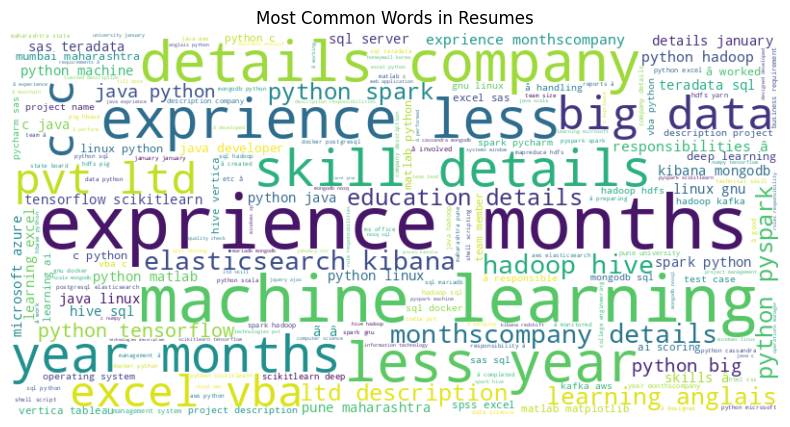

In [14]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply text cleaning
df['Cleaned_Resume'] = df['Resume'].apply(clean_text)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Cleaned_Resume']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Resumes")
plt.show()

## Remarks
1. Distribution of Resume Categories:
   
The most frequent categories are:
+ Java Developer (84 resumes)
+ Testing (70 resumes)
+ DevOps Engineer (55 resumes)
+ Python Developer (48 resumes)
+ Web Designing (45 resumes)

This suggests a strong presence of profiles related to software development and emerging technologies.

2. Resume Length Analysis:

Average: 3,160 characters
+ Minimum: 142 characters (probably a very short or poorly formatted resume)
+ Maximum: 14,816 characters (a highly detailed resume)
+ Distribution: Most resumes are between 1,200 and 4,000 characters in length.

3. Most Frequent Words Analysis:
The most common words include "and", "the", "of", "to", "in", which are expected in English texts.
An interesting word to note is "exprience", which seems to be a common misspelling of "experience." This suggests that further text cleaning might be necessary.

4. Interpretation and Key Insights

+ Category Balance: Some categories have significantly more examples than others, which could create an imbalance when training a classification model.
+ Data Cleaning Needs: Spelling mistakes and special characters ("â\x80¢") indicate that additional text preprocessing is required.
+ Resume Length Variation: There is a wide range in resume lengths, and it may be interesting to examine whether certain categories tend to have longer or shorter resumes.

5. Next Steps:
+ Perform a deeper analysis of keywords specific to each category.
+ Improve text cleaning (removal of special characters, spelling corrections).
+ Build a classification model to categorize resumes based on their content.

# Data preparation

In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import nltk
from nltk.corpus import stopwords
import re
import string

## Text Preprocessing

In [16]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply text cleaning
df['Cleaned_Resume'] = df['Resume'].apply(clean_text)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Tokenization and Padding

In [17]:
max_words = 20000  # Maximum number of words in the vocabulary
max_len = 300  # Maximum sequence length

# Tokenize text
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Cleaned_Resume'])
word_index = tokenizer.word_index

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['Cleaned_Resume'])
X = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

## Label Encoding

In [18]:
label_mapping = {label: idx for idx, label in enumerate(df['Category'].unique())}
df['Category_Label'] = df['Category'].map(label_mapping)
y = to_categorical(df['Category_Label'])  # Convert labels to one-hot encoding

## Train-Test Split

When separating data into training and test sets, we use the train_test_split function in sklearn.model_selection. Two important parameters in this function are stratify and random_state.

stratify: Ensuring a balanced distribution of classes
random_state: Ensure reproducibility of results

In [19]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# First, split into Training (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split Temp (30%) into Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print dataset sizes for verification
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")


Training set size: 7380
Validation set size: 1582
Test set size: 1582


# Deep Learning

In this section, we will apply three powerful deep learning models for the classification of data : LSTM, BERT, CNN.

1. LSTM (Long Short-Term Memory)
+ LSTM is a type of recurrent neural network (RNN) designed to process sequential data.
+ It remembers long-term dependencies, making it great for text classification and language modeling.
+ It prevents vanishing gradient problems in deep networks.

2. CNN (Convolutional Neural Networks)
+ CNNs are commonly used in image processing but also work well for text classification.
+ They use filters to capture patterns in text sequences, making them effective for document classification.
+ CNNs are faster than LSTMs since they process words in parallel rather than sequentially.

3. BERT (Bidirectional Encoder Representations from Transformers)
+ BERT is a transformer-based model that understands the context of words by analyzing the sentence in both directions (left-to-right and right-to-left).
+ It is pretrained on large datasets and fine-tuned for specific tasks like text classification, sentiment analysis, and question-answering.
+ It achieves state-of-the-art accuracy but requires more computational power.


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Bidirectional
from transformers import TFAutoModel, AutoTokenizer
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

# Constants
max_len = 300
max_words = 20000
embedding_dim = 128
num_classes = len(set(df['Category']))

In [21]:
# -----------------------------
# 1. LSTM Model
# -----------------------------
def build_lstm_model():
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
        Bidirectional(LSTM(128, return_sequences=True)),
        Dropout(0.3),
        LSTM(64),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [22]:
# -----------------------------
# 2. CNN Model
# -----------------------------
def build_cnn_model():
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
        Conv1D(128, 5, activation='relu'),
        MaxPooling1D(5),
        Conv1D(64, 5, activation='relu'),
        MaxPooling1D(5),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model



1️⃣ Parameters in Sequential Model (LSTM & CNN)
The Sequential model in TensorFlow/Keras is a simple way to stack layers in order. Here’s a breakdown of key parameters:

+ Embedding(input_dim, output_dim, input_length) : Converts words into numerical vectors (word embeddings).
     + input_dim: Size of vocabulary (e.g., 20,000 words).
     + output_dim: Dimension of word embeddings (e.g., 128).
     + input_length: Maximum number of words in a sequence (e.g., 300).

+ LSTM(units, return_sequences)
    + units: Number of neurons in the LSTM layer.
    + return_sequences=True: Returns a sequence of outputs (useful when stacking LSTM layers).
      
+ Dropout(rate) :  Prevents overfitting by randomly turning off neurons during training.
    + rate: Fraction of neurons to drop (e.g., 0.3 = 30%).

+ Dense(units, activation)
     + units: Number of neurons.
     + activation='relu': Used in hidden layers to learn patterns.
     + activation='softmax': Used in the final layer for classification.

+ Conv1D(filters, kernel_size, activation)
     + filters: Number of filters (detects text patterns).
     + kernel_size: Size of the filter (usually 3, 5, or 7).
     + activation='relu': Helps the model learn complex patterns.


+ MaxPooling1D is a downsampling technique used in Convolutional Neural Networks (CNNs) for text classification. It reduces the size of feature maps while keeping the most important information.

+ Flatten is a layer that converts a multi-dimensional tensor into a 1D vector. It is usually applied after Convolutional and Pooling layers to prepare the data for a Dense layer.


***Loss and Optimizer***

+ loss='categorical_crossentropy'
    + Used for multi-class classification (more than two categories).
    + Measures the difference between predicted and actual class probabilities. Example: If a CV belongs to "Data Science," the model assigns probabilities to all classes, and categorical crossentropy calculates the error.

+ optimizer='adam'
    + Adam (Adaptive Moment Estimation) is an optimization algorithm.
    + Adjusts learning rates automatically for better training.
    + Faster and more efficient than traditional optimizers like SGD (Stochastic Gradient Descent).

In [23]:
# Build models
lstm_model = build_lstm_model()
cnn_model = build_cnn_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


## Model Training (LSTM & CNN )

In [24]:
def train_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
    model.save(f"{model_name}.h5")
    print(f"{model_name} training completed and saved.")

# Train LSTM and CNN models
train_model(lstm_model, X_train, y_train, X_test, y_test, "LSTM_Model")

Epoch 1/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.3291 - loss: 2.0115 - val_accuracy: 0.3704 - val_loss: 1.6828
Epoch 2/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.3590 - loss: 1.7169 - val_accuracy: 0.3818 - val_loss: 1.5152
Epoch 3/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - accuracy: 0.5169 - loss: 1.3128 - val_accuracy: 0.3805 - val_loss: 1.6562
Epoch 4/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.4132 - loss: 1.5311 - val_accuracy: 0.7295 - val_loss: 0.8830
Epoch 5/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - accuracy: 0.6615 - loss: 0.8151 - val_accuracy: 0.7965 - val_loss: 0.6304
Epoch 6/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.7864 - loss: 0.6493 - val_accuracy: 0.7996 - val_loss: 0.5667
Epoch 7/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - accuracy: 0.7959 - loss: 0.5875 - val_accuracy: 0.8028 - val_loss: 0.5559
Epoch 8/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - accuracy: 0.7956 - loss: 0.5849 - 

In [25]:
train_model(cnn_model, X_train, y_train, X_test, y_test, "CNN_Model")

Epoch 1/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.4484 - loss: 1.5834 - val_accuracy: 0.8230 - val_loss: 0.4645
Epoch 2/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8352 - loss: 0.4342 - val_accuracy: 0.8793 - val_loss: 0.3082
Epoch 3/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8754 - loss: 0.3001 - val_accuracy: 0.8774 - val_loss: 0.3076
Epoch 4/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8833 - loss: 0.2837 - val_accuracy: 0.8704 - val_loss: 0.2926
Epoch 5/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8767 - loss: 0.2776 - val_accuracy: 0.8837 - val_loss: 0.2808
Epoch 6/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8752 - loss: 0.2775 - val_accuracy: 0.8831 - val_loss: 0.2773
Epoch 7/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8708 - loss: 0.2862 - val_accuracy: 0.8742 - val_loss: 0.2755
Epoch 8/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8785 - loss: 0.2614 - val_accuracy: 0

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
LSTM Model Accuracy: 0.8072

Classification Report for LSTM Model:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         3
           3       1.00      0.20      0.33         5
           4       1.00      0.86      0.92         7
           5       1.00      0.33      0.50         6
           6       1.00      0.17      0.29         6
           7       0.00      0.00      0.00         4
           8       1.00      0.75      0.86         4
           9       0.17      1.00      0.29        13
          10       0.00      0.00      0.00         4
          11       1.00      0.67      0.80         3
          12       1.00      0.50      0.67         4
          13       1.00      0.40      0.57         5
          14       1.00      1.00      1.00         6
          15       1.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


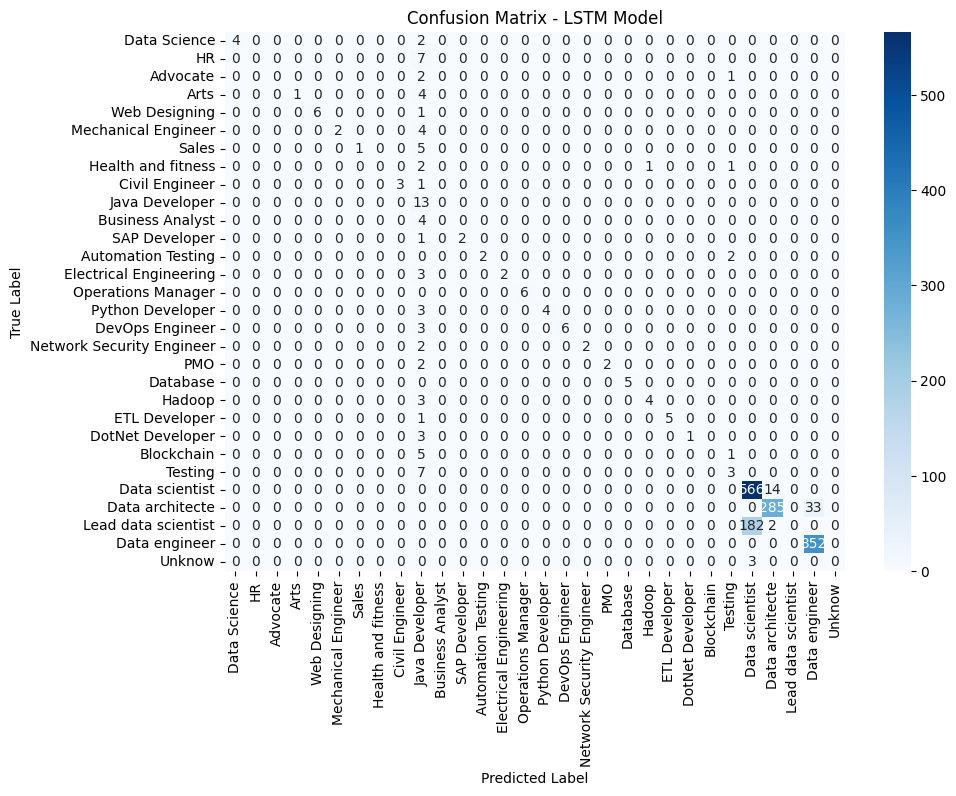

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
CNN Model Accuracy: 0.8837

Classification Report for CNN Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         6
          15       1.00      1.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


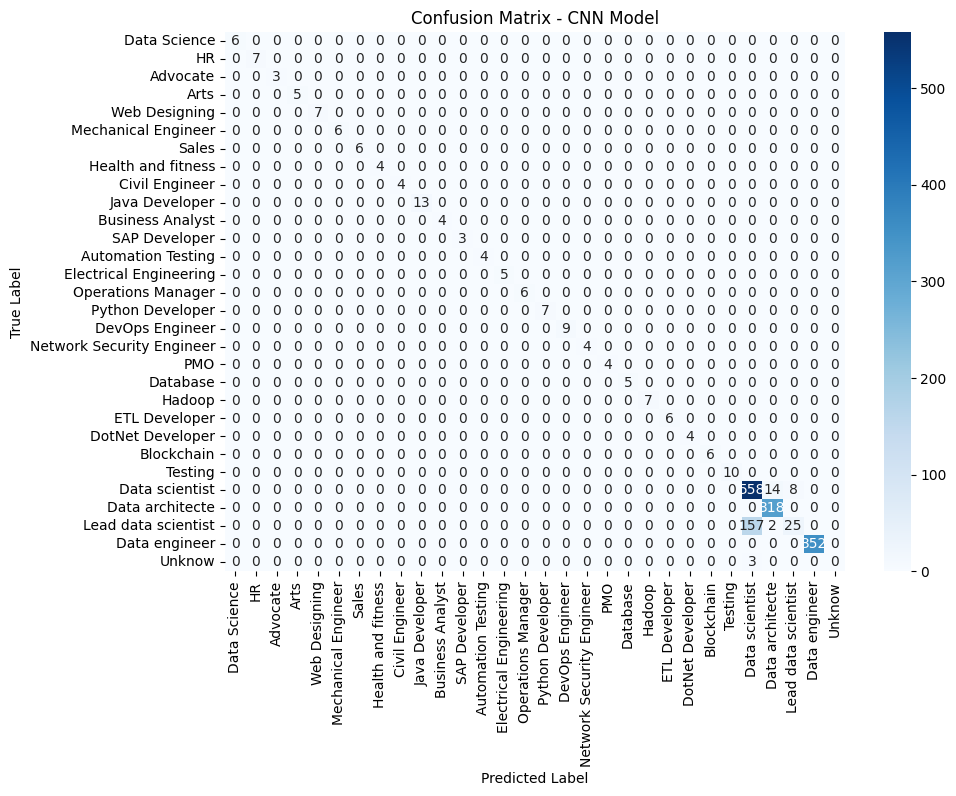

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow as tf

def evaluate_model(model, X_test, y_test, model_name):
    """Evaluate a trained model and visualize the performance."""
    # Predict classes
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}\n")
    
    # Generate classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_true, y_pred))
    
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Evaluate all models
evaluate_model(lstm_model, X_test, y_test, "LSTM Model")
evaluate_model(cnn_model, X_test, y_test, "CNN Model")
#evaluate_model(bert_model, X_test, y_test, "BERT Model")


## Model trainning (BERT)

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from transformers import AutoModel, AutoTokenizer
import pandas as pd
from sklearn.model_selection import train_test_split

# Tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [28]:
# Label encoding
label_mapping = {label: idx for idx, label in enumerate(df['Category'].unique())}
df['Category_Label'] = df['Category'].map(label_mapping)
num_classes = len(label_mapping)

In [29]:
# Define dataset class
class ResumeDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=300):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer(text, padding='max_length', truncation=True, max_length=self.max_len, return_tensors="pt")
        
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "labels": torch.tensor(label, dtype=torch.long)
        }

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Resume'], df['Category_Label'], test_size=0.2, random_state=42, stratify=df['Category_Label'])

# Create datasets and dataloaders
train_dataset = ResumeDataset(X_train.tolist(), y_train.tolist(), tokenizer)
test_dataset = ResumeDataset(X_test.tolist(), y_test.tolist(), tokenizer)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)



In [30]:
# Define BERT model
class BertClassifier(nn.Module):
    def __init__(self, num_classes):
        super(BertClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained("bert-base-uncased")
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)
    
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        x = self.dropout(pooled_output)
        x = self.fc(x)
        return x


In [31]:
# Initialize model, loss function, optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertClassifier(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-5)

# Training loop
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        correct = 0
        total = 0
        
        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
        
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader):.4f}, Accuracy: {correct/total:.4f}")

# Train the model
train_model(model, train_loader, criterion, optimizer, num_epochs=5)



model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Epoch 1/5, Loss: 0.9113, Accuracy: 0.7315
Epoch 2/5, Loss: 0.5223, Accuracy: 0.8190
Epoch 3/5, Loss: 0.4015, Accuracy: 0.8686
Epoch 4/5, Loss: 0.3229, Accuracy: 0.8797
Epoch 5/5, Loss: 0.3002, Accuracy: 0.8798


In [32]:
# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(input_ids, attention_mask)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")
    return all_labels, all_preds



In [33]:
# Evaluate the model
evaluate_model(model, test_loader)

# Save the trained model
torch.save(model.state_dict(), "bert_resume_classifier.pth")
print("Training and evaluation complete. Model saved.")


Test Accuracy: 0.8753
Training and evaluation complete. Model saved.
